<h1>Курсовая работа (BIG DATA)<h1>

<h2>Тема: Исследование по загрязнению воздуха в Кыргызской Республики</h2>

<h3>Команда: ЭТЭ</h3>
<h3>Жээнбеков Эрбол</h3>
<h3>Акматов Тариэл</h3>
<h3>Исмаилов Эмирхан</h3>

# (1) Получение данных и перевод их в DataFrame для дальнейшей работы

In [248]:
import pandas as pd
from datetime import datetime

file_path = 'air_pollution_data_kyrgyzstan.xlsx'
air_pollution = pd.read_excel(file_path)

In [249]:
air_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Дата                      60 non-null     datetime64[ns]
 1   Город                     60 non-null     object        
 2   PM2.5                     60 non-null     float64       
 3   PM10                      60 non-null     object        
 4   SO2                       60 non-null     float64       
 5   Демография                60 non-null     object        
 6   Здоровье населения        60 non-null     object        
 7   Экономические показатели  60 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 3.9+ KB


In [250]:
print("Ключи digits_dataset: \n{}".format(air_pollution.keys()))

Ключи digits_dataset: 
Index(['Дата', 'Город', 'PM2.5', 'PM10', 'SO2', 'Демография',
       'Здоровье населения', 'Экономические показатели'],
      dtype='object')


In [251]:
air_pollution_sorted = air_pollution.sort_values(by='Дата')
air_pollution_sorted.head()

,Дата,Город,PM2.5,PM10,SO2,Демография,Здоровье населения,Экономические показатели
0,2022-01-31,Бишкек,161.288609,93.788962,31.574340,Высокая плотность,Среднее,Высокий ВВП
1,2022-01-31,Ош,175.576748,108.564857,34.345786,Высокая плотность,Плохое,Средний ВВП
2,2022-01-31,Джалал-Абад,170.387538,104.846564,33.184563,Средняя плотность,Плохое,Низкий ВВП
3,2022-01-31,Каракол,103.496870,92.598685,21.749376,Средняя плотность,Хорошее,Средний ВВП
4,2022-01-31,Талас,108.958934,94.475638,22.194673,Низкая плотность,Среднее,Низкий ВВП


## (2) Сохранение и сортировка данных по месяцам

In [252]:
air_pollution_sorted["Дата"] = pd.to_datetime(air_pollution_sorted["Дата"], format="%m/%d/%Y, %H:%M:%S")
air_pollution_sorted.head(10)

,Дата,Город,PM2.5,PM10,SO2,Демография,Здоровье населения,Экономические показатели
0,2022-01-31,Бишкек,161.288609,93.788962,31.574340,Высокая плотность,Среднее,Высокий ВВП
1,2022-01-31,Ош,175.576748,108.564857,34.345786,Высокая плотность,Плохое,Средний ВВП
2,2022-01-31,Джалал-Абад,170.387538,104.846564,33.184563,Средняя плотность,Плохое,Низкий ВВП
3,2022-01-31,Каракол,103.496870,92.598685,21.749376,Средняя плотность,Хорошее,Средний ВВП
4,2022-01-31,Талас,108.958934,94.475638,22.194673,Низкая плотность,Среднее,Низкий ВВП
5,2022-02-28,Бишкек,102.356705,91.284635,20.578479,Высокая плотность,Среднее,Высокий ВВП
6,2022-02-28,Ош,121.589345,97.182946,23.956734,Высокая плотность,Плохое,Средний ВВП
7,2022-02-28,Джалал-Абад,117.926564,95.984782,22.756498,Средняя плотность,Плохое,Низкий ВВП
8,2022-02-28,Каракол,68.456584,54.688735,14.658365,Средняя плотность,Хорошее,Средний ВВП
9,2022-02-28,Талас,71.578768,57.329875,16.497535,Низкая плотность,Среднее,Низкий ВВП


In [253]:
monthly_air_pollution_a_cleaneds = {group['Дата'].dt.strftime('%B').iloc[0]: group for _, group in air_pollution_sorted.groupby(air_pollution_sorted['Дата'].dt.month)}

<h4>Я сделал именно такое сохранение так, как в случае сохранения даты в виде строки, отображение в excel происходит в виде "2022-01-31", но сам тип поля "Дата" становится object</h4>

In [254]:
for month_name, group in monthly_air_pollution_a_cleaneds.items():
    file_name_month = f"air_pollution_data_kyrgyzstan_{month_name.lower()}.xlsx"
    group["Дата"] = pd.to_datetime(group["Дата"], format="%Y-%m-%d")
    group.to_excel(file_name_month, index=False)

<h4>Вот здесь ниже я привожу пример одной из таблиц для того чтобы наглядно показать сохранение данных в виде даты</h4>

In [255]:
april_path = 'air_pollution_data_kyrgyzstan_april.xlsx'
april_air = pd.read_excel(april_path)
april_air.head() 

,Дата,Город,PM2.5,PM10,SO2,Демография,Здоровье населения,Экономические показатели
0,2022-04-30,Бишкек,24.896420,11.856395,7.358584,Высокая плотность,Среднее,Высокий ВВП
1,2022-04-30,Ош,30.578484,13.689385,9.583958,Высокая плотность,Плохое,Средний ВВП
2,2022-04-30,Джалал-Абад,29.495678,12.724057,8.305729,Средняя плотность,Плохое,Низкий ВВП
3,2022-04-30,Каракол,13.615316,10.395739,4.683858,Средняя плотность,Хорошее,Средний ВВП
4,2022-04-30,Талас,27.395740,12.590479,8.137373,Низкая плотность,Среднее,Низкий ВВП


In [256]:
april_air["Дата"] = pd.to_datetime(april_air["Дата"], format="%Y-%m-%d")
april_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Дата                      5 non-null      datetime64[ns]
 1   Город                     5 non-null      object        
 2   PM2.5                     5 non-null      float64       
 3   PM10                      5 non-null      float64       
 4   SO2                       5 non-null      float64       
 5   Демография                5 non-null      object        
 6   Здоровье населения        5 non-null      object        
 7   Экономические показатели  5 non-null      object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 448.0+ bytes


## Сохранение и сортировка данных по городам

In [257]:
grouped_by_city = air_pollution_sorted.groupby('Город')

In [258]:
for city, group in grouped_by_city:
    if city == 'Бишкек':
        city = 'Bishkek'
    if city == 'Ош':
        city = 'Osh'
    if city == 'Джалал-Абад':
        city = 'Djalal-abad'
    if city == 'Каракол':
        city = 'Karakol'
    if city == 'Талас':
        city = 'Talas'
    file_name_city = f"air_pollution_data_kyrgyzstan_{city.lower()}.xlsx"
    group.to_excel(file_name_city, index=False)

In [259]:
talas_path = 'air_pollution_data_kyrgyzstan_talas.xlsx'
talas_air = pd.read_excel(talas_path)
talas_air.head() 

,Дата,Город,PM2.5,PM10,SO2,Демография,Здоровье населения,Экономические показатели
0,2022-01-31,Талас,108.958934,94.475638,22.194673,Низкая плотность,Среднее,Низкий ВВП
1,2022-02-28,Талас,71.578768,57.329875,16.497535,Низкая плотность,Среднее,Низкий ВВП
2,2022-03-31,Талас,55.769619,42.578386,13.567835,Низкая плотность,Среднее,Низкий ВВП
3,2022-04-30,Талас,27.395740,12.590479,8.137373,Низкая плотность,Среднее,Низкий ВВП
4,2022-05-31,Талас,11.090407,7.166133,3.482536,Низкая плотность,Среднее,Низкий ВВП


In [260]:
talas_air["Дата"] = pd.to_datetime(talas_air["Дата"], format="%Y-%m-%d")
talas_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Дата                      12 non-null     datetime64[ns]
 1   Город                     12 non-null     object        
 2   PM2.5                     12 non-null     float64       
 3   PM10                      12 non-null     float64       
 4   SO2                       12 non-null     float64       
 5   Демография                12 non-null     object        
 6   Здоровье населения        12 non-null     object        
 7   Экономические показатели  12 non-null     object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 896.0+ bytes


## Подготовка данных
<h3>Очистка данных от выбросов и аномалий</h3>
<h4>Для удаления выбросов и аномалий из данных перед расчетом скользящего среднего и стандартного отклонения, можно использовать межквартильный размах (IQR)</h4>

In [261]:
air_pollution_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Дата                      60 non-null     datetime64[ns]
 1   Город                     60 non-null     object        
 2   PM2.5                     60 non-null     float64       
 3   PM10                      60 non-null     object        
 4   SO2                       60 non-null     float64       
 5   Демография                60 non-null     object        
 6   Здоровье населения        60 non-null     object        
 7   Экономические показатели  60 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 4.2+ KB


In [262]:
# Обработка пустых значений
air_pollution_cleaned = air_pollution_sorted.ffill()  # Заполнение пропущенных значений предыдущими значениями
# Удаление дубликатов 
air_pollution_cleaned = air_pollution_cleaned.drop_duplicates()

print(air_pollution_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Дата                      60 non-null     datetime64[ns]
 1   Город                     60 non-null     object        
 2   PM2.5                     60 non-null     float64       
 3   PM10                      60 non-null     object        
 4   SO2                       60 non-null     float64       
 5   Демография                60 non-null     object        
 6   Здоровье населения        60 non-null     object        
 7   Экономические показатели  60 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 4.2+ KB
None


In [263]:
air_pollution_cleaned.tail()

,Дата,Город,PM2.5,PM10,SO2,Демография,Здоровье населения,Экономические показатели
58,2022-12-31,Каракол,120.124959,75.129588,25.129588,Средняя плотность,Хорошее,Средний ВВП
55,2022-12-31,Бишкек,143.529215,88.134958,28.492751,Высокая плотность,Среднее,Высокий ВВП
56,2022-12-31,Ош,146.158021,90.124588,31.124988,Высокая плотность,Плохое,Средний ВВП
57,2022-12-31,Джалал-Абад,146.125988,90.125878,31.124981,Средняя плотность,Плохое,Низкий ВВП
59,2022-12-31,Талас,125.125988,78.958712,23.129858,Низкая плотность,Среднее,Низкий ВВП


In [264]:
air_pollution_cleaned['PM10'] = pd.to_numeric(air_pollution_cleaned['PM10'], errors='coerce')
print(air_pollution_cleaned['PM10'])
print(air_pollution_cleaned['PM10'].dtype)

0      93.788962
1     108.564857
2     104.846564
3      92.598685
4      94.475638
5      91.284635
6      97.182946
7      95.984782
8      54.688735
9      57.329875
14     42.578386
12     29.985689
13      9.869489
10     29.472789
11     30.578586
15     11.856395
16     13.689385
17     12.724057
18     10.395739
19     12.590479
20      5.653817
21      6.319583
22      8.514262
23      5.319584
24      7.166133
28      1.384874
27      2.668388
29      1.819475
25      1.575738
26      2.313747
30      0.978316
31      1.218475
32      1.438473
33      0.813755
34      0.981395
35      2.524819
36      3.213588
37      3.713958
38      1.854828
39      2.631255
44     10.135581
42     11.457818
43      9.345872
40     10.349127
41     12.549828
45     29.582658
46     31.592857
47     32.149581
48     27.149568
49     26.143958
54     55.149598
53           NaN
51     60.139598
50     54.149581
52     64.195813
58     75.129588
55     88.134958
56     90.124588
57     90.1258

In [265]:
air_pollution_cleaned.dropna()['PM10'].tail(10)

49    26.143958
54    55.149598
51    60.139598
50    54.149581
52    64.195813
58    75.129588
55    88.134958
56    90.124588
57    90.125878
59    78.958712
Name: PM10, dtype: float64

In [266]:

# Предполагая, что ваш DataFrame назван 'air_pollution_cleaned'
# Замените 'air_pollution_cleaned' на фактическое имя вашего DataFrame, если оно отличается

# Выберите столбцы типа float
float_columns = air_pollution_cleaned.select_dtypes(include=['float64']).columns

# Проверьте каждый столбец float на наличие значений, не являющихся float
for column in float_columns:
    non_float_values = air_pollution_cleaned[~air_pollution_cleaned[column].apply(lambda x: isinstance(x, (int, float)))][column]
    
    if not non_float_values.empty:
        print(f"Столбец '{column}' содержит значения, не являющиеся типом float:")
        print(non_float_values)
        print("\n")
    else:
        print(f"Столбец '{column}' содержит только значения типа float.\n")


Столбец 'PM2.5' содержит только значения типа float.

Столбец 'PM10' содержит только значения типа float.

Столбец 'SO2' содержит только значения типа float.


In [271]:
air_pollution_cleaned.info()
air_pollution_cleaned.set_index('Дата', inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Дата                      60 non-null     datetime64[ns]
 1   Город                     60 non-null     object        
 2   PM2.5                     60 non-null     float64       
 3   PM10                      59 non-null     float64       
 4   SO2                       60 non-null     float64       
 5   Демография                60 non-null     object        
 6   Здоровье населения        60 non-null     object        
 7   Экономические показатели  60 non-null     object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 4.2+ KB


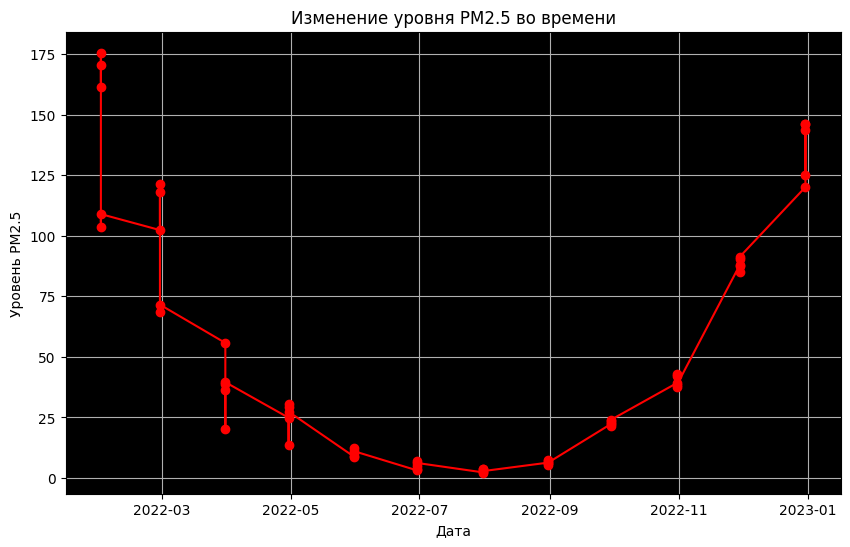

In [272]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(air_pollution_cleaned.index, air_pollution_cleaned['PM2.5'], marker='o', linestyle='-', color='red')
plt.title('Изменение уровня PM2.5 во времени')
plt.xlabel('Дата')
plt.gca().set_facecolor('black')

plt.ylabel('Уровень PM2.5')
plt.grid(True)
plt.show()


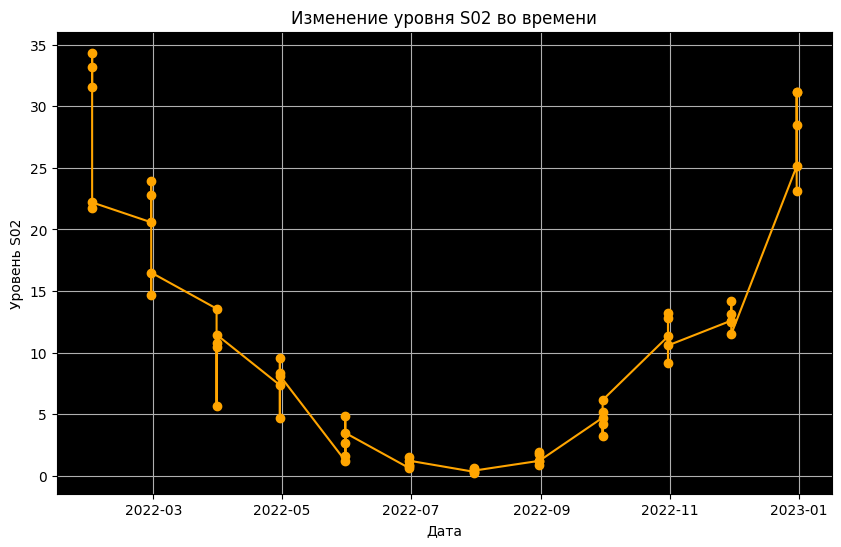

In [276]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(air_pollution_cleaned.index, air_pollution_cleaned['SO2'], marker='o', linestyle='-', color='orange')
plt.title('Изменение уровня S02 во времени')
plt.xlabel('Дата')
plt.gca().set_facecolor('black')

plt.ylabel('Уровень S02')
plt.grid(True)
plt.show()


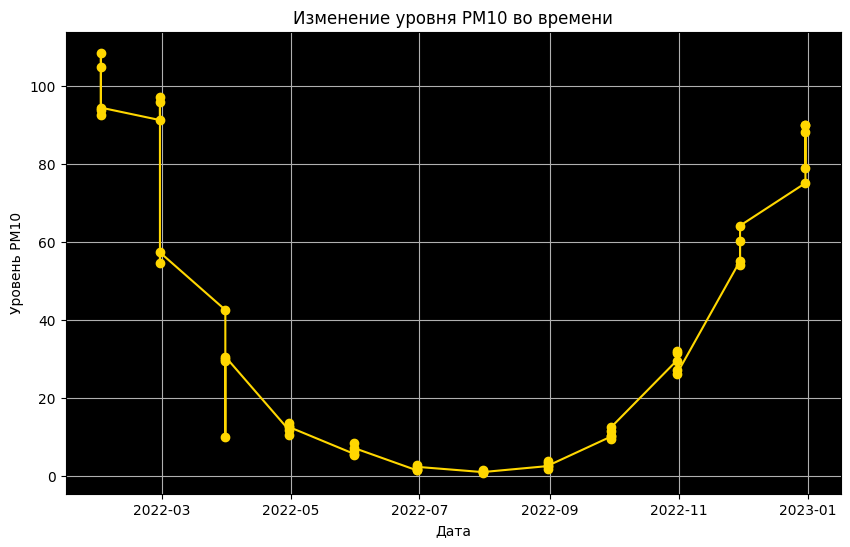

In [282]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(air_pollution_cleaned.index, air_pollution_cleaned['PM10'], marker='o', linestyle='-', color='gold')
plt.title('Изменение уровня PM10 во времени')
plt.xlabel('Дата')
plt.gca().set_facecolor('black')

plt.ylabel('Уровень PM10')
plt.grid(True)
plt.show()


<h3>Давайте возьмем Бишкек для примера!</h3>

In [ ]:
bishkek_path = 'air_pollution_data_kyrgyzstan_talas.xlsx'
bishkek_air = pd.read_excel(talas_path)
talas_air.head() 